In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# Funcao para gerar dataset a partir do conjunto de dados
def dataframe_2_dataset(dataframe, batch_size):
  labels = dataframe.pop(0)
  data_array = dataframe.to_numpy()
  matrices = [data_array[i].reshape((10, 10, 1)) for i in range(len(dataframe))]
  dataset = tf.data.Dataset.from_tensor_slices((matrices, labels))
  dataset = dataset.batch(batch_size)
  return dataset

In [ ]:
# Funcao para criar o modelo CNN
def criar_modelo_cnn():
  # Camada Entrada
  input = tf.keras.Input(shape=(10, 10, 1))

  # Camada Convolucional 1
  conv1 = tf.keras.layers.Conv2D(48, (3, 3), activation='relu')(input)

  # Camada Convolucional 2
  conv2 = tf.keras.layers.Conv2D(124, (3, 3), activation='relu')(conv1)

  # Camada Convolucional 3
  conv3 = tf.keras.layers.Conv2D(44, (3, 3), activation='relu')(conv2)

  # Camada MaxPooling
  max_pool = tf.keras.layers.MaxPooling2D((2, 2))(conv3)

  # Camada Flatten
  flatten = tf.keras.layers.Flatten()(max_pool)

  # Camada Densa
  dense = tf.keras.layers.Dense(216, activation='relu')(flatten)

  # Camada Saída
  output = tf.keras.layers.Dense(1, activation='sigmoid')(dense)

  # Combina as camadas em um modelo sequencial
  model = tf.keras.Model(inputs=input, outputs=output)

  # Compila o modelo, define o otimizador, a funcao de perda e as metricas
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall(),
                       tf.keras.metrics.TruePositives(),
                       tf.keras.metrics.TrueNegatives(),
                       tf.keras.metrics.FalsePositives(),
                       tf.keras.metrics.FalseNegatives()])

  return model

In [ ]:
# Carrega e aleatoriza o conjunto de treinamento e teste
dataframe_treinamento = pd.read_csv('/pole/datasets/treinamento.csv', header=None).sample(frac=1, random_state=32)
print('Quantidade de dados de treinamento: ', len(dataframe_treinamento))

# Carrega e aleatoriza o conjunto de teste
dataframe_teste = pd.read_csv('/pole/datasets/teste.csv', header=None).sample(frac=1, random_state=32)
print('Quantidade de dados de teste: ', len(dataframe_teste))

# Cria os datasets de treinamento e teste
dataset_treinamento = dataframe_2_dataset(dataframe_treinamento, 64)
dataset_teste = dataframe_2_dataset(dataframe_teste, 64)

Quantidade de dados de treinamento:  15264
Quantidade de dados de teste:  3816


In [ ]:
# Treinamento
model = criar_modelo_cnn()
history = model.fit(dataset_treinamento, epochs=334)

Epoch 1/334
239/239 [==============================] - 3s 9ms/step - loss: 0.6873 - binary_accuracy: 0.5324 - precision: 0.5343 - recall: 0.5052 - true_positives: 3856.0000 - true_negatives: 4271.0000 - false_positives: 3361.0000 - false_negatives: 3776.0000
Epoch 2/334
239/239 [==============================] - 2s 8ms/step - loss: 0.3697 - binary_accuracy: 0.8219 - precision: 0.8514 - recall: 0.7800 - true_positives: 5953.0000 - true_negatives: 6593.0000 - false_positives: 1039.0000 - false_negatives: 1679.0000
Epoch 3/334
239/239 [==============================] - 2s 9ms/step - loss: 0.2349 - binary_accuracy: 0.8878 - precision: 0.9128 - recall: 0.8574 - true_positives: 6544.0000 - true_negatives: 7007.0000 - false_positives: 625.0000 - false_negatives: 1088.0000
Epoch 4/334
239/239 [==============================] - 2s 8ms/step - loss: 0.2141 - binary_accuracy: 0.8941 - precision: 0.9160 - recall: 0.8678 - true_positives: 6623.0000 - true_negatives: 7025.0000 - false_positives: 607.

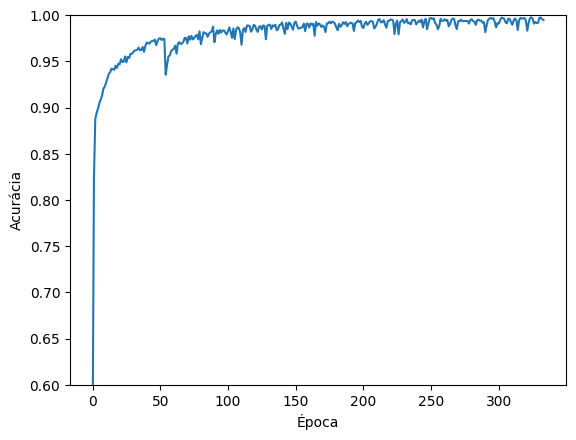

In [ ]:
# Exibe o gráfico da acurácia ao longo das épocas
plt.plot(history.history['binary_accuracy'])
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0.6, 1])
plt.show()

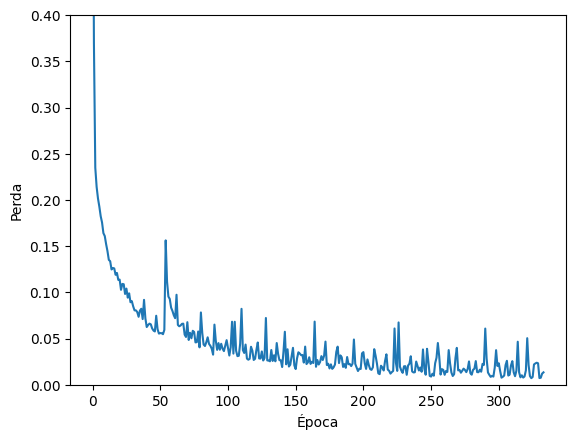

In [ ]:
# Exibe o gráfico da perda ao longo das épocas
plt.plot(history.history['loss'])
plt.xlabel('Época')
plt.ylabel('Perda')
plt.ylim([0, 0.4])
plt.show()

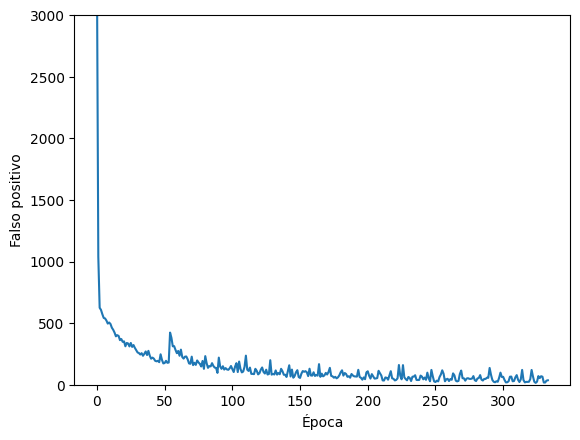

In [ ]:
# Exibe o gráfico de falso positivo ao longo das épocas
plt.plot(history.history['false_positives'])
plt.xlabel('Época')
plt.ylabel('Falso positivo')
plt.ylim([0, 3000])
plt.show()

In [ ]:
# Teste
model.evaluate(dataset_teste)

60/60 [==============================] - 0s 4ms/step - loss: 0.0380 - binary_accuracy: 0.9903 - precision: 0.9921 - recall: 0.9885 - true_positives: 1886.0000 - true_negatives: 1893.0000 - false_positives: 15.0000 - false_negatives: 22.0000


[0.037973552942276,
 0.9903039932250977,
 0.9921094179153442,
 0.9884696006774902,
 1886.0,
 1893.0,
 15.0,
 22.0]